<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/Interpolacion01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Interpolación Lineal

La medición de la densidad del carbonato de potasio a distintas concentraciones a temperatura constante genera los siguientes datos.

$$
\begin{array}{l|c|c|c|c|c|c}
\text{Densidad}&4.1& 12.2& 20.3& 28.2& 38.1& 45.2\\
\hline
\text{Concentración}&1.0276& 1.1013& 1.1801& 1.2652& 1.3480& 1.4120
\end{array}
$$

Obtener la densidad del Carbonato de Potasio a una concentración de 15%.

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
x=np.array([4.1,12.2,20.3,28.2,38.1,45.2])
y=np.array([1.0276,1.1013,1.1801,1.2652,1.3480,1.4120])

In [ ]:
xi=15
p=interpolate.interp1d(x,y)
yi=p(xi)
print(yi)

1.1285395061728394


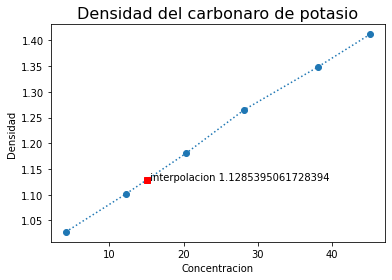

In [ ]:
plt.plot(x,y,'o:',xi,yi,'sr')
plt.title('Densidad del carbonaro de potasio',fontsize=16)
plt.xlabel('Concentracion')
plt.ylabel('Densidad')
plt.text(xi,yi,' interpolacion '+str(yi))
plt.show()

##Interpolación de Lagrange

En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

$$
\begin{array}{l|c|c|c|c|c|c}
\text{Dia}&1& 4& 8& 13& 18\\
\hline
\text{Profundidad}&1.1& 1.5& 12.8& 15.3& 15.5
\end{array}
$$

Calcular la profundidad del agua en el día 3.

In [2]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

In [3]:
x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])

In [8]:
p=lagrange(x,y)
xi=3
yi=p(xi)
print(yi)

-0.3424369747899192


In [5]:
from numpy.polynomial.polynomial import Polynomial
Polynomial(p).coef

array([ 4.04341737e-03, -1.58700280e-01,  1.94220028e+00, -6.58865266e+00,
        5.90110924e+00])

$$
f(x)=5.9-6.58865x+1.9422028x^2-0.15870028x^3+0.00404341737x^4
$$

In [11]:
f=lambda x:4.04341737e-03*x**4-1.58700280e-01*x**3+1.94220028e+00*x**2 -6.58865266e+00*x+5.90110924e+00
f(3)

-0.342436973029999

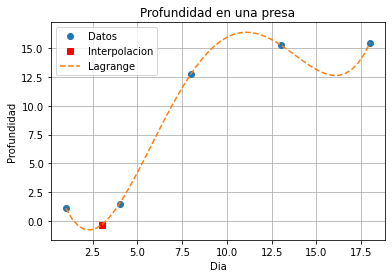

In [ ]:
xs=np.linspace(x.min(),x.max())
ys=p(xs)

plt.plot(x,y,'o',xi,yi,'sr',xs,ys,'--')
plt.legend(['Datos','Interpolacion','Lagrange'])
plt.xlabel('Dia')
plt.ylabel('Profundidad')
plt.title('Profundidad en una presa')
plt.grid()
plt.show()

##Interpolación Spline cúbico

Usar la interpolación de Spline Cúbico en el problema de Runge.

Usemos la función
$$
f(x)=\frac{1}{1+25x^2}
$$

en el intervalo $x\in[-1,1]$

In [13]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [14]:
x=np.linspace(-1,1,10)
y=1/(1+25*x**2)

In [17]:
s=interpolate.interp1d(x,y,kind='cubic')
xs=np.linspace(x.min(),x.max())
ys=s(xs)

In [19]:
v=interpolate.interp1d(x,y,kind='nearest')
xs=np.linspace(x.min(),x.max())
yv=v(xs)

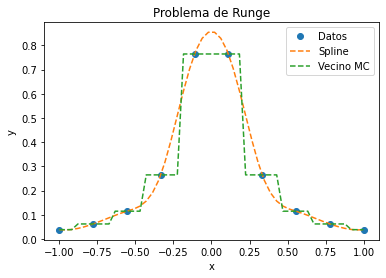

In [21]:
plt.plot(x,y,'o',xs,ys,'--',xs,yv,'--')
plt.legend(['Datos','Spline','Vecino MC'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Problema de Runge')
plt.show()

##Interpolación en 2 dimensiones

La siguiente información muestra la Entalpía de vapor supercalentado a distintas temperaturas y presiones, use la interpolación en dos dimensiones para estimar la Entalpía a 420K y 190Kpa

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Presión\Temperatura}&300 &350 &400 &450 &500\\
\hline
150 &3073.3 &3174.7 &3277.5 &3381.7 &3487.6\\
200 &3072.1 &3173.8 &3276.7 &3381.1 &3487.0\\
250 &3070.9 &3172.8 &3275.9 &3380.4 &3486.5\\
300 &3069.7 &3171.9 &3275.2 &3379.8 &3486.0\\
\hline
\end{array}
$$



In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
x=np.array ([300 ,350 ,400 ,450 ,500])
y=np.array ([150 ,200 ,250 ,300])
z=np.array ([[3073.3 ,3174.7 ,3277.5 ,3381.7 ,3487.6] ,\
              [3072.1 ,3173.8 ,3276.7 ,3381.1 ,3487.0] ,\
              [3070.9 ,3172.8 ,3275.9 ,3380.4 ,3486.5] ,\
              [3069.7 ,3171.9 ,3275.2 ,3379.8 ,3486.0]])

In [ ]:
f= interpolate.interp2d(x,y,z,kind='cubic')
xi,yi=420,190
zi=f (xi,yi)
print(zi)

[3318.426752]


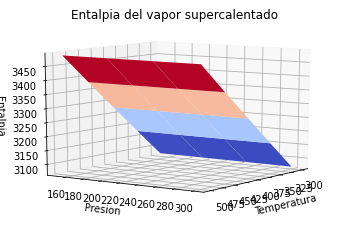

In [ ]:
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, z,cmap =cm.coolwarm)
ax.view_init(10,35)
ax.set_xlabel('Temperatura')
ax.set_ylabel('Presion')
ax.set_zlabel('Entalpia')
ax.set_title('Entalpia del vapor')
plt.show()